### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
batting = pd.read_csv('Batting_Dataset.csv')

In [3]:
batting.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Position,Captain,Wicketkeeper
0,RG Sharma (IND),2019-2019,9,9,1,648,140,81.00,659,98.33,5,1,-,67,14,Opener,No,No
1,DA Warner (AUS),2019-2019,10,10,1,647,166,71.88,724,89.36,3,3,-,66,8,Opener,No,No
2,Shakib Al Hasan (BAN),2019-2019,8,8,1,606,124*,86.57,631,96.03,2,5,-,60,2,All-rounder,No,No
3,KS Williamson (NZ),2019-2019,10,9,2,578,148,82.57,771,74.96,2,2,-,50,3,Top-Order,Yes,No
4,JE Root (ENG),2019-2019,11,11,2,556,107,61.77,621,89.53,2,3,-,48,2,Top-Order,No,No


In [63]:
bowling = pd.read_csv('Bowling_Dataset.csv')

In [64]:
bowling.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Position
0,MA Starc (AUS),2019-2019,10,10,554,92.2,5,502,27,May-26,18.59,5.43,20.51,2,2,L.Pace
1,LH Ferguson (NZ),2019-2019,9,9,502,83.4,3,409,21,Apr-37,19.47,4.88,23.90,1,-,Pace
2,JC Archer (ENG),2019-2019,11,11,605,100.5,8,461,20,Mar-27,23.05,4.57,30.25,-,-,Pace
3,Mustafizur Rahman (BAN),2019-2019,8,8,433,72.1,2,484,20,May-59,24.20,6.70,21.65,-,2,L.Pace
4,JJ Bumrah (IND),2019-2019,9,9,504,84.0,9,371,18,Apr-55,20.61,4.41,28.00,1,-,Pace


# Data Visualization

###  Bar Graphs

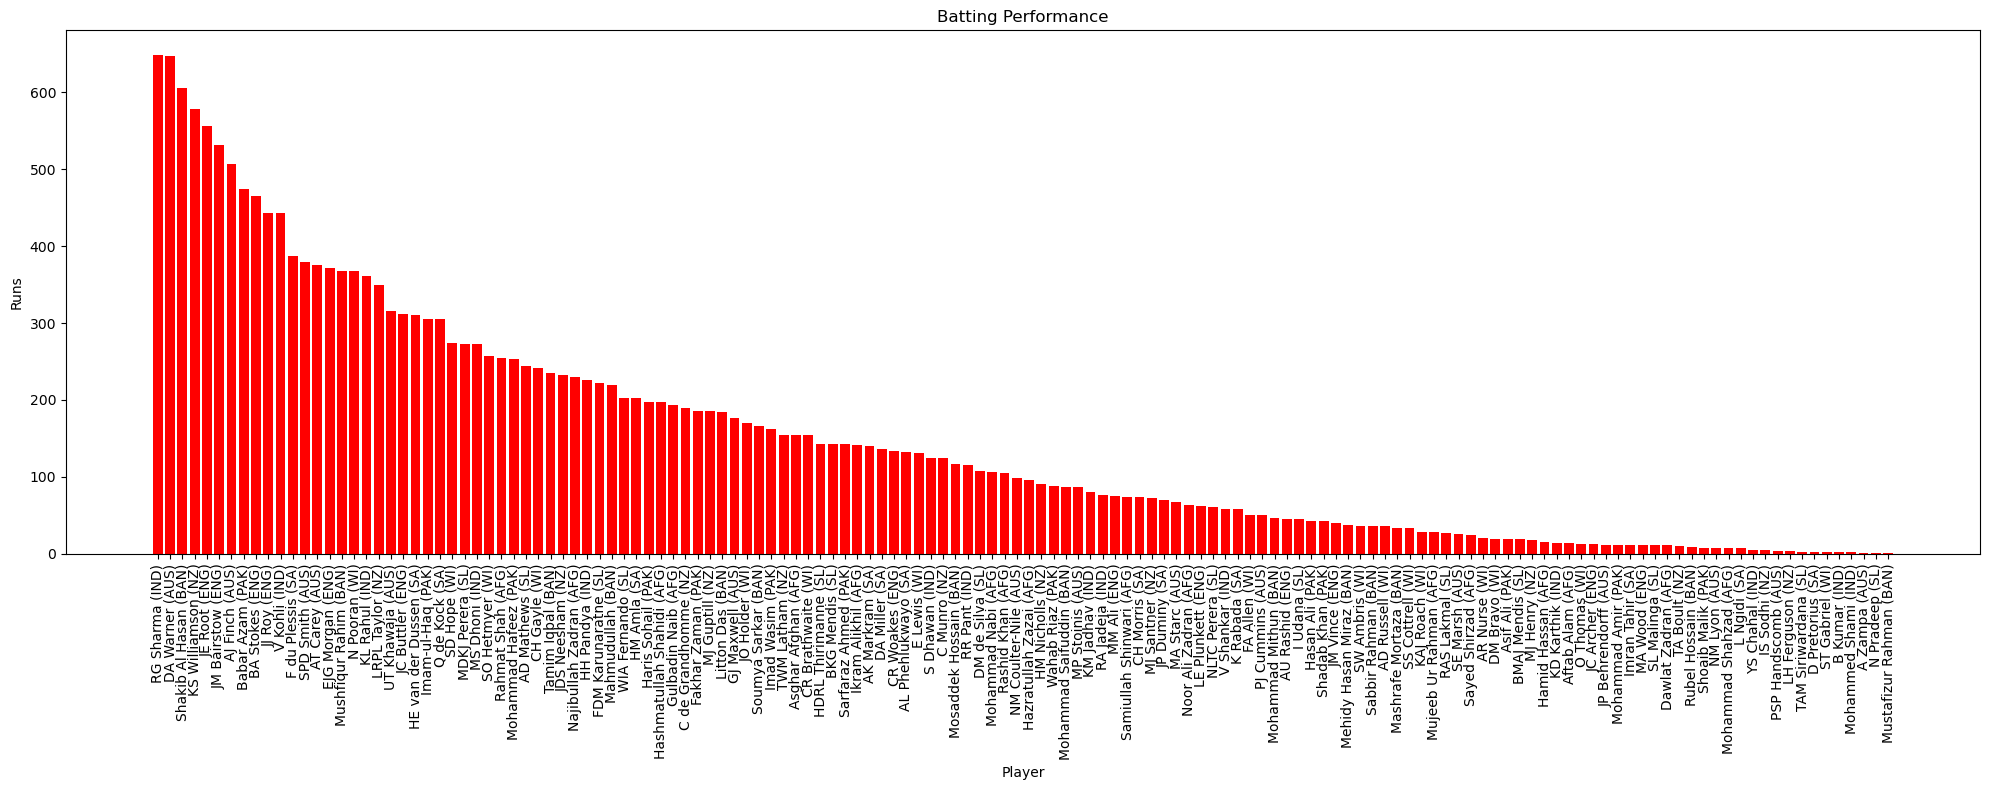

In [44]:
player_names = batting['Player']
runs = batting['Runs']

# Create a bar plot
plt.figure(figsize=(20, 8))  # Optional: Adjust the figure size
plt.bar(player_names, runs, color='red')

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Batting Performance')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

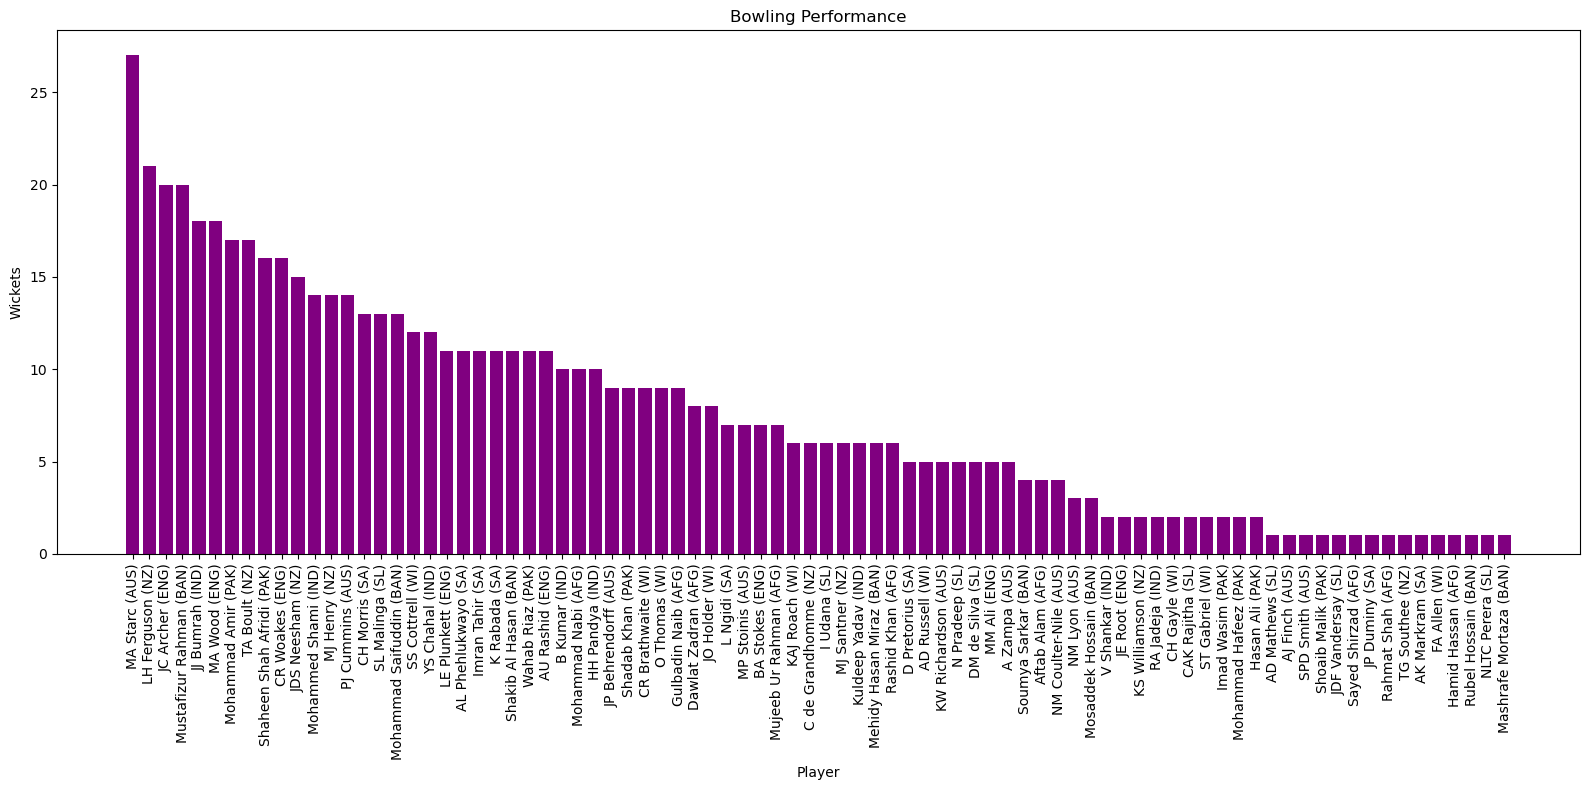

In [43]:
player_names = bowling['Player']
wickets = bowling['Wkts']

# Create a bar plot
plt.figure(figsize=(16, 8))  # Optional: Adjust the figure size
plt.bar(player_names, wickets,  color='purple')

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Bowling Performance')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

## Histogram

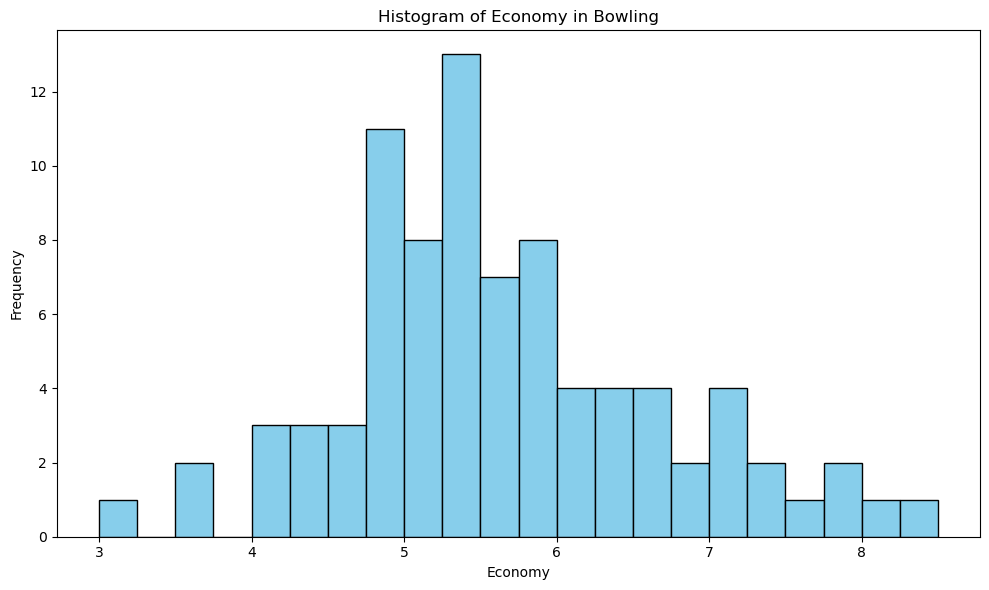

In [8]:
economy = bowling['Econ']

bin_range = (3, 8.5)  # Range from 3 to 9
num_bins = 22  # Number of bins

# Calculate the bin width
bin_width = (bin_range[1] - bin_range[0]) / num_bins

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(economy, bins=num_bins, range=bin_range, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Economy')
plt.ylabel('Frequency')
plt.title('Histogram of Economy in Bowling')

# Show the plot
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

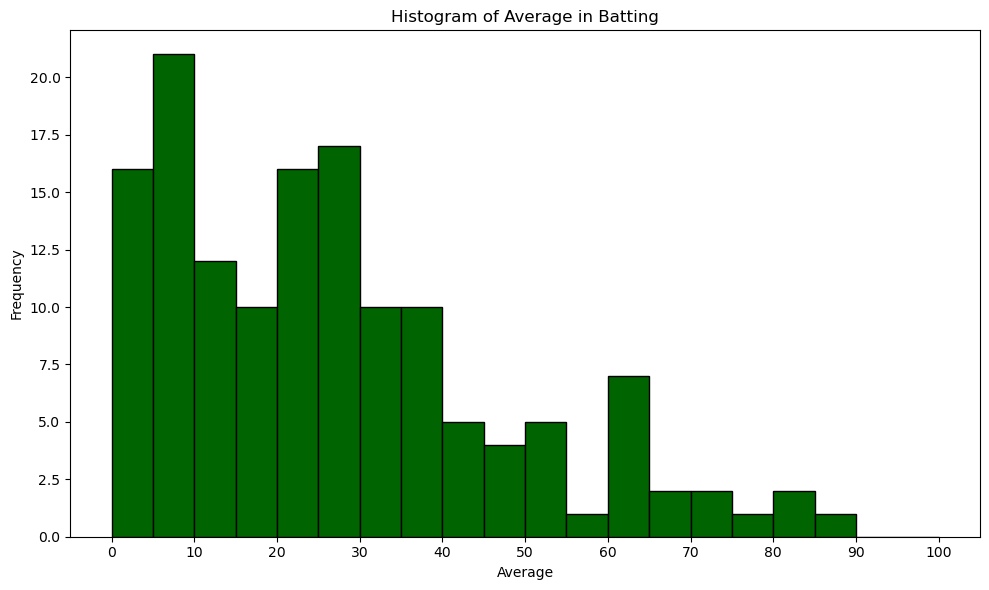

In [9]:
average = batting['Ave']

bin_range = (0, 100)  # Range from 3 to 9
num_bins = 20  # Number of bins

# Calculate the bin width
bin_width = (bin_range[1] - bin_range[0]) / num_bins

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(average, bins=num_bins, range=bin_range, color='darkgreen', edgecolor='black')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('Histogram of Average in Batting')

# Show the plot
plt.xticks(range(0, 101, 10))
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

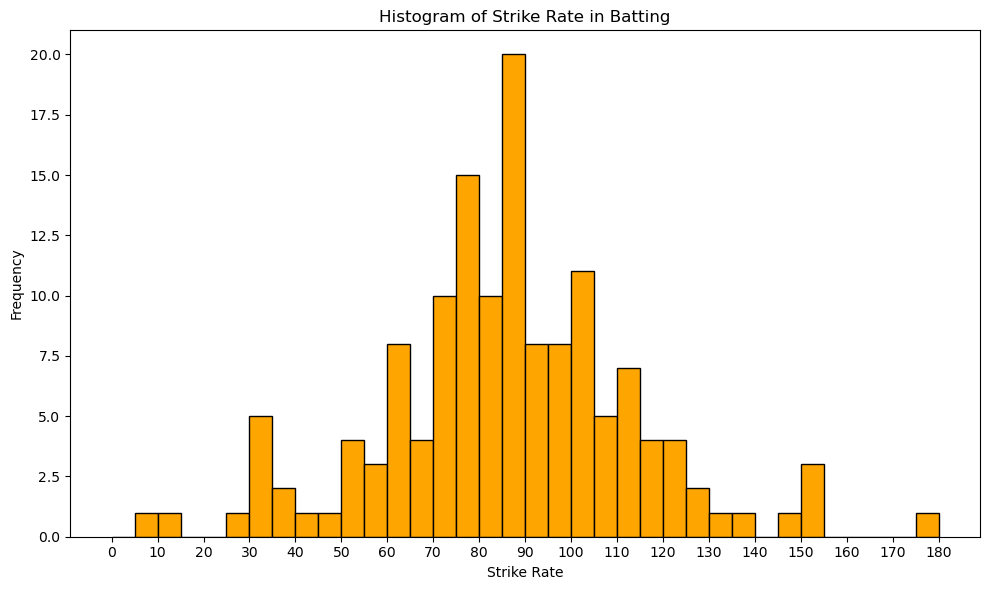

In [18]:
SR = batting['SR']


bin_range = (0, 180)  # Range from 3 to 9
num_bins = 36  # Number of bins

# Calculate the bin width
bin_width = (bin_range[1] - bin_range[0]) / num_bins

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(SR, bins=num_bins, range=bin_range, color='orange', edgecolor='black')

# Adding labels and title
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Strike Rate in Batting')

x_ticks = range(0, 181, 10)
plt.xticks(x_ticks)

# Show the plot
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()


## Scatter Plot

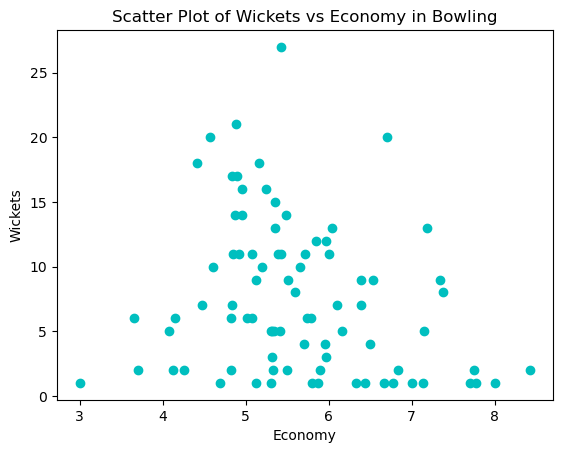

In [28]:
ec = bowling['Econ']
w = bowling['Wkts']
plt.scatter(ec, w, color='c')
plt.xlabel('Economy')
plt.ylabel('Wickets')
plt.title('Scatter Plot of Wickets vs Economy in Bowling')

plt.show()

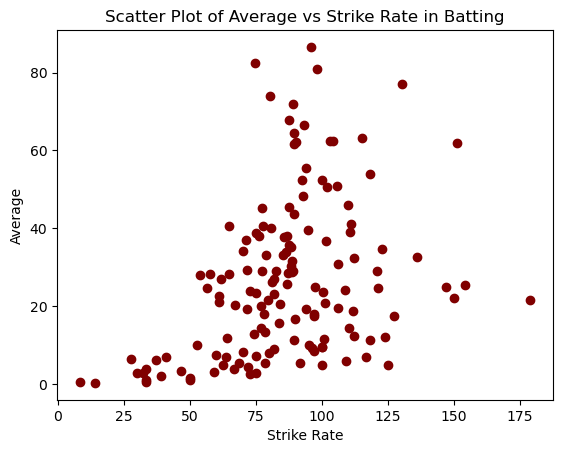

In [35]:
ave = batting['Ave']
sr = batting['SR']
plt.scatter(sr, ave, color='maroon')
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.title('Scatter Plot of Average vs Strike Rate in Batting')

plt.show()

## Pairplot

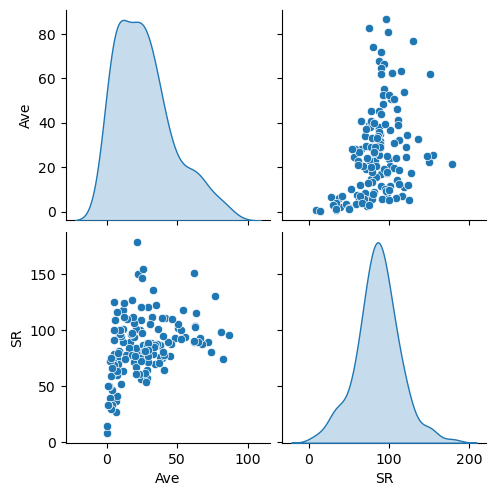

In [37]:
sns.pairplot(batting, vars=['Ave', 'SR'], diag_kind="kde")

# Show the plot
plt.show()

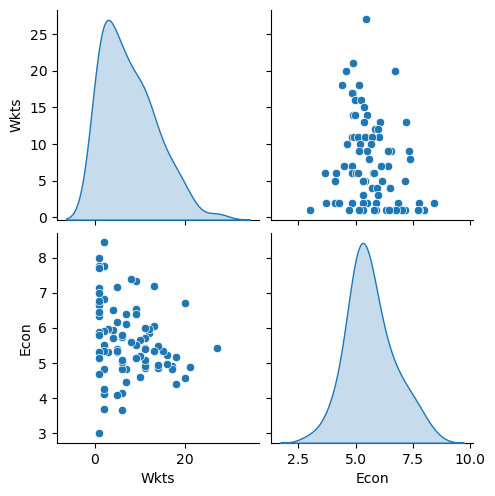

In [39]:
sns.pairplot(bowling, vars=['Wkts', 'Econ'], diag_kind="kde")

# Show the plot
plt.show()

## Pie Plot

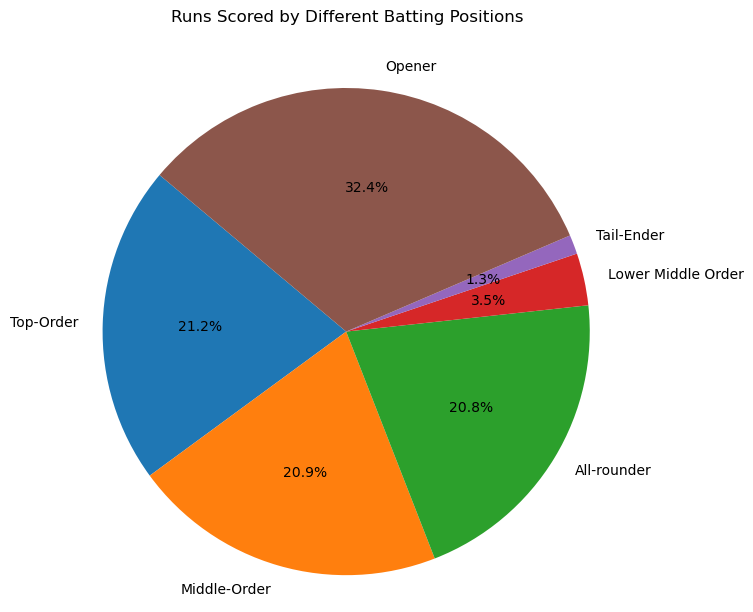

In [76]:
position_order = ['Top-Order', 'Middle-Order','All-rounder', 'Lower Middle Order', 'Tail-Ender', 'Opener']

batting['Position'] = pd.Categorical(batting['Position'], categories=position_order, ordered=True)

# Group the data by 'Position' and calculate the total runs for each position
position_runs = batting.groupby('Position')['Runs'].sum().reset_index()

# Create a pie plot
plt.figure(figsize=(7, 7))  # Optional: Adjust the figure size
plt.pie(position_runs['Runs'], labels=position_runs['Position'], autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Runs Scored by Different Batting Positions', pad=30)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

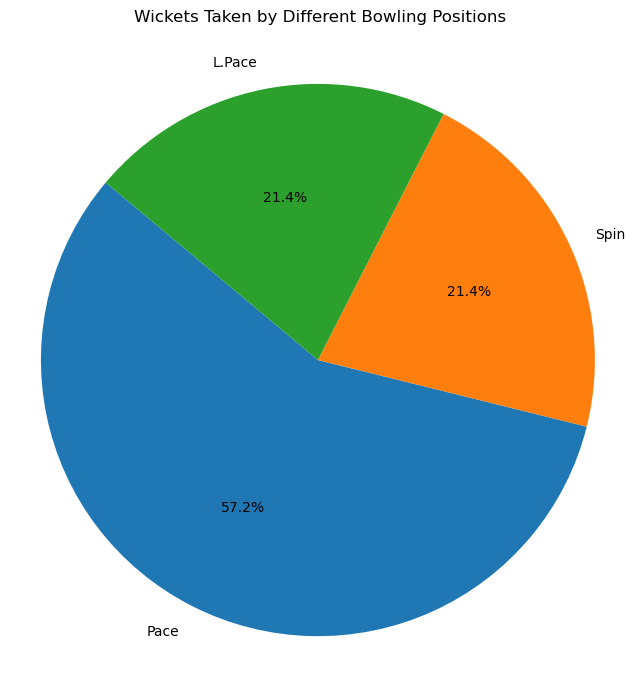

In [75]:
position_order = ['Pace', 'Spin', 'L.Pace']

# Convert the 'Position' column to a categorical data type with custom ordering
bowling['Position'] = pd.Categorical(bowling['Position'], categories=position_order, ordered=True)

# Group the data by 'Position' and calculate the total wickets for each position
position_wickets = bowling.groupby('Position')['Wkts'].sum().reset_index()

# Create a pie plot
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size

# Adding a title with some padding
plt.title('Wickets Taken by Different Bowling Positions', pad=20)  # Increase the pad to add more space

# Create the pie chart
plt.pie(position_wickets['Wkts'], labels=position_wickets['Position'], autopct='%1.1f%%', startangle=140)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

In [74]:
spin_bowlers = bowling[bowling['Position'] == 'L.Pace']

# Calculate the sum of wickets taken by spin bowlers
total_wickets_by_spin = spin_bowlers['Wkts'].sum()

print("Total wickets taken by spin bowlers:", total_wickets_by_spin)

Total wickets taken by spin bowlers: 136


# Starting the Dream Team Selection 

## Selecting the Openers

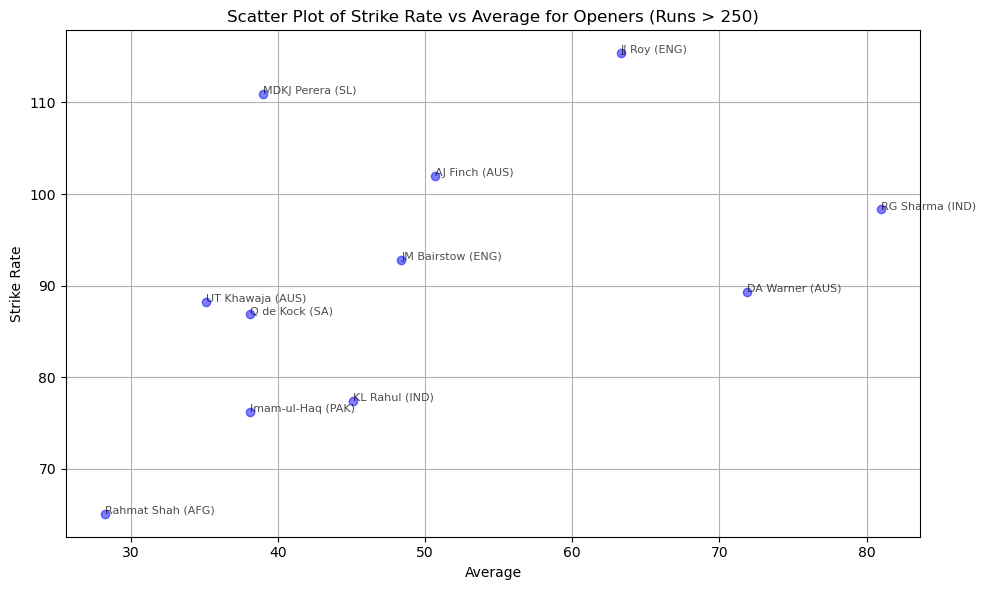

In [109]:
openers_above_250 = batting[(batting['Position'] == 'Opener') & (batting['Runs'] > 250)]

# Create a scatter plot of 'Average' vs. 'Strike Rate'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Scatter plot
scatter = plt.scatter(openers_above_250['Ave'], openers_above_250['SR'], alpha=0.5, color='blue')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Openers (Runs > 250)')

# Add player names near the dots
for i, player in openers_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

In [110]:
openers_above_250 = batting[(batting['Position'] == 'Opener') & (batting['Runs'] > 250)]

# Calculate batting score (Average x Strike Rate)
openers_above_250['Batting_Score'] = openers_above_250['Ave'] * openers_above_250['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_openers = openers_above_250.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with openers ranked by Batting_Score
print(sorted_openers[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

               Player    Ave      SR  Runs  Batting_Score
0     RG Sharma (IND)  81.00   98.33   648      7964.7300
9        JJ Roy (ENG)  63.28  115.36   443      7299.9808
1     DA Warner (AUS)  71.88   89.36   647      6423.1968
6      AJ Finch (AUS)  50.70  102.01   507      5171.9070
5   JM Bairstow (ENG)  48.36   92.84   532      4489.7424
25   MDKJ Perera (SL)  39.00  110.97   273      4327.8300
17     KL Rahul (IND)  45.12   77.46   361      3494.9952
23     Q de Kock (SA)  38.12   86.89   305      3312.2468
19   UT Khawaja (AUS)  35.11   88.26   316      3098.8086
22  Imam-ul-Haq (PAK)  38.12   76.25   305      2906.6500
28  Rahmat Shah (AFG)  28.22   65.12   254      1837.6864


C:\Users\Floyd\AppData\Local\Temp\ipykernel_13724\541406358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openers_above_250['Batting_Score'] = openers_above_250['Ave'] * openers_above_250['SR']


### **Explanation:** 

- Among the openers, Rohit Sharma has the highest average and 4th highest strike rate, hence he is chosen.
- Among the openers, David Warner has the 2nd highest average, while Jason Roy has the 3rd highest average. However, J.Roy has a much higher strike rate than D.Warner. The difference is 26, which is a significantly larger margin compared to the difference in their averages (which is only 8). Therefore, J. Roy is chosen.
- Even the **batting_score which is the product of average and strike rate** supports our selection as these 2 openers are on the top of the Batting_score List.

## Selecting the Top-Order Batsmen

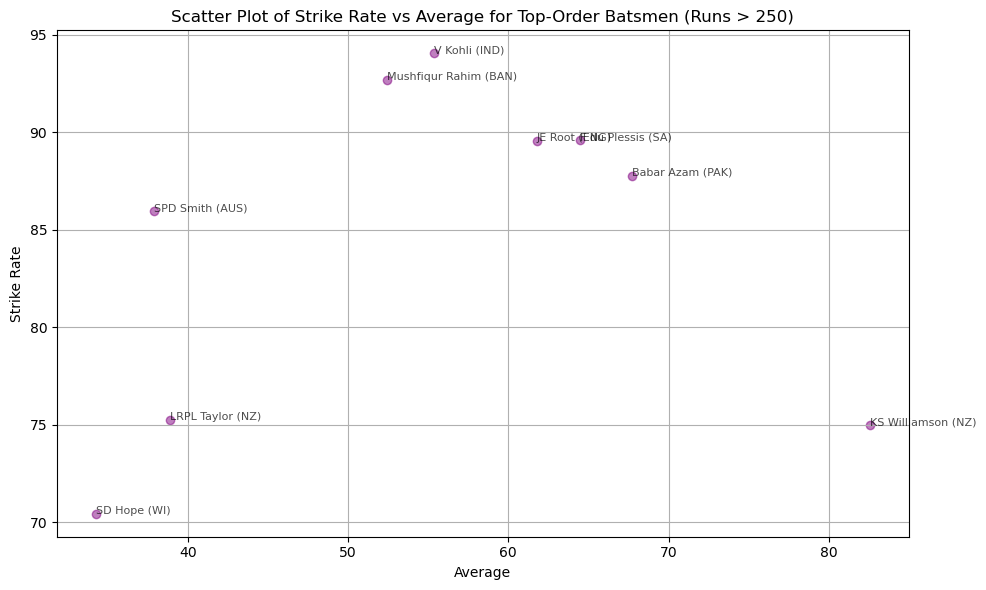

In [111]:
top_order_above_250 = batting[(batting['Position'] == 'Top-Order') & (batting['Runs'] > 250)]

# Create a scatter plot of 'Average' vs. 'Strike Rate'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Scatter plot
scatter = plt.scatter(top_order_above_250['Ave'], top_order_above_250['SR'], alpha=0.5, color='purple')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Top-Order Batsmen (Runs > 250)')

# Add player names near the dots
for i, player in top_order_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

In [124]:
top_order_above_250 = batting[(batting['Position'] == 'Top-Order') & (batting['Runs'] > 250)]

# Calculate batting score (Average x Strike Rate)
top_order_above_250['Batting_Score'] = top_order_above_250['Ave'] * top_order_above_250['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_top = top_order_above_250.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with openers ranked by Batting_Score
print(sorted_top[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

                   Player    Ave     SR  Runs  Batting_Score
3      KS Williamson (NZ)  82.57  74.96   578      6189.4472
7        Babar Azam (PAK)  67.71  87.77   474      5942.9067
11      F du Plessis (SA)  64.50  89.58   387      5777.9100
4           JE Root (ENG)  61.77  89.53   556      5530.2681
10          V Kohli (IND)  55.37  94.05   443      5207.5485
15  Mushfiqur Rahim (BAN)  52.42  92.67   367      4857.7614
12        SPD Smith (AUS)  37.90  85.94   379      3257.1260
18       LRPL Taylor (NZ)  38.88  75.26   350      2926.1088
24           SD Hope (WI)  34.25  70.43   274      2412.2275


C:\Users\Floyd\AppData\Local\Temp\ipykernel_13724\2223154796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_order_above_250['Batting_Score'] = top_order_above_250['Ave'] * top_order_above_250['SR']


### **Explanation:** 

- Among the top-order batsmen, K.Williamson has the highest average. Though his strike rate is low, his average is far above the rest. Being a top-order batsmen, average matters much more than strike rate as they have to set the foundation for the innings and hence need to bat slowly sometimes. Thus, K.Williamson is chosen. Besides, he is also on top of the Batting_Score List.
- As seen in the scatter plot, it is difficult to identify a clear favourite among the next 4 batsmen. Hence, we look at the Batting_Score List to make a decision. Babar Azam is 2nd and has the highest batting_score among these 4 batsmen. Thus, he is chosen.

## Selecting Middle-Order Batsman

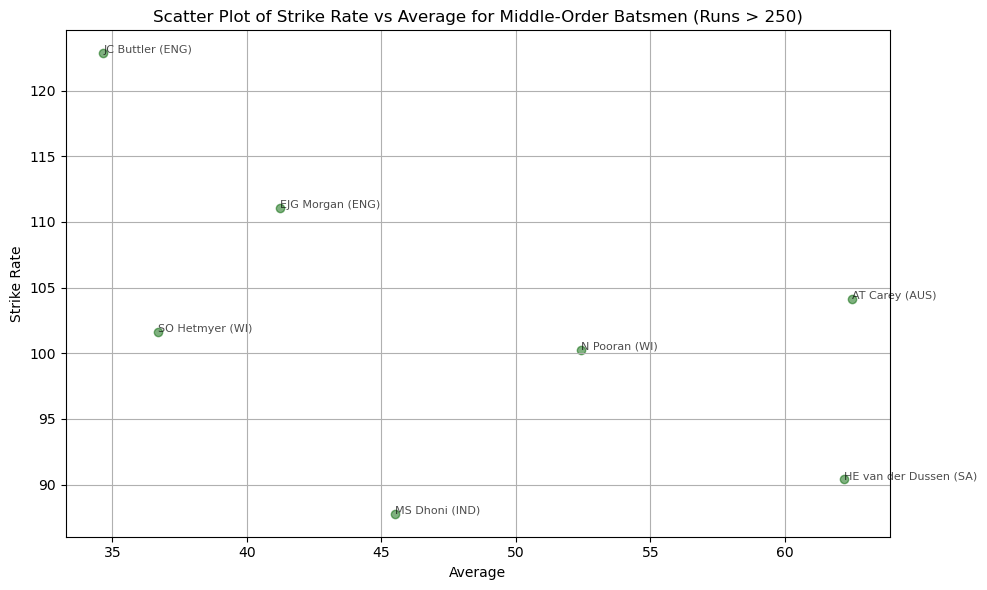

In [120]:
middle_above_250 = batting[(batting['Position'] == 'Middle-Order') & (batting['Runs'] > 250)]

# Create a scatter plot of 'Average' vs. 'Strike Rate'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Scatter plot
scatter = plt.scatter(middle_above_250['Ave'], middle_above_250['SR'], alpha=0.5, color='darkgreen')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Middle-Order Batsmen (Runs > 250)')

# Add player names near the dots
for i, player in middle_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

In [125]:
middle_above_250 = batting[(batting['Position'] == 'Middle-Order') & (batting['Runs'] > 250)]

# Calculate batting score (Average x Strike Rate)
middle_above_250['Batting_Score'] = middle_above_250['Ave'] * middle_above_250['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_middle = middle_above_250.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with openers ranked by Batting_Score
print(sorted_middle[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

                    Player    Ave      SR  Runs  Batting_Score
13          AT Carey (AUS)  62.50  104.16   375      6510.0000
21  HE van der Dussen (SA)  62.20   90.40   311      5622.8800
16           N Pooran (WI)  52.42  100.27   367      5256.1534
14        EJG Morgan (ENG)  41.22  111.07   371      4578.3054
20        JC Buttler (ENG)  34.66  122.83   312      4257.2878
26          MS Dhoni (IND)  45.50   87.78   273      3993.9900
27         SO Hetmyer (WI)  36.71  101.58   257      3729.0018


C:\Users\Floyd\AppData\Local\Temp\ipykernel_13724\1132525935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_above_250['Batting_Score'] = middle_above_250['Ave'] * middle_above_250['SR']


### **Explanation:** 

- J.Buttler has an extremely high strike rate however his average is low, hence he is inconsistent and thus rejected.
- The difference between E.Morgan and A.Carey's strike rates are marginal however the difference in average is quite vast hence A.Carey is the preferred option as his average is much higher compared to E.Morgan.
- Our decision is supported by the Batting_score List in which A.Carey has the highest batting_score. 

## Selecting All-Rounders

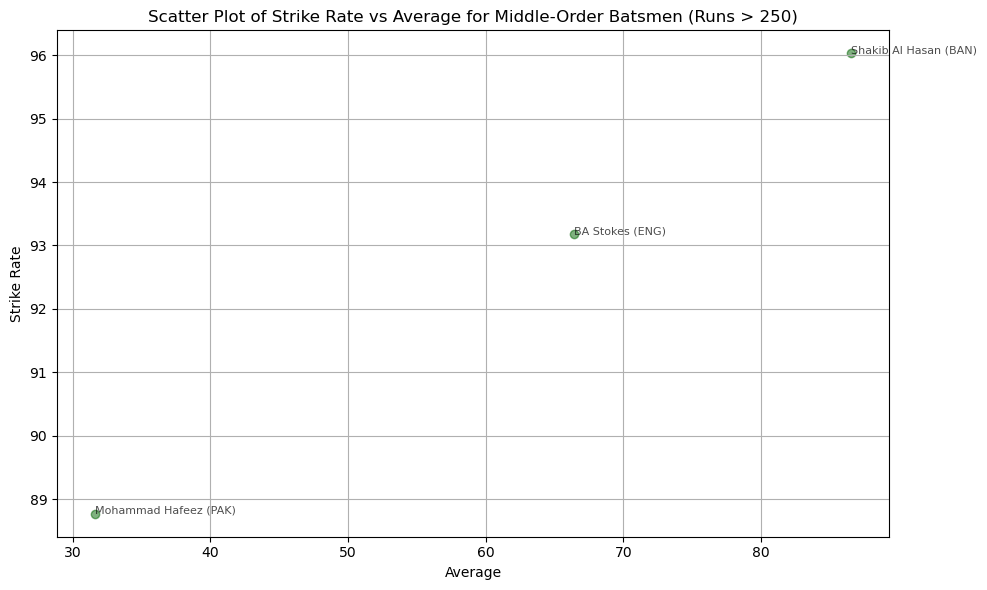

In [145]:
all_rounder_above_250 = batting[(batting['Position'] == 'All-rounder') & (batting['Runs'] > 200)]

# Create a scatter plot of 'Average' vs. 'Strike Rate'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Scatter plot
scatter = plt.scatter(all_rounder_above_250['Ave'], all_rounder_above_250['SR'], alpha=0.5, color='darkgreen')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Middle-Order Batsmen (Runs > 250)')

# Add player names near the dots
for i, player in all_rounder_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()

In [128]:
all_rounder_above_250 = batting[(batting['Position'] == 'All-rounder') & (batting['Runs'] > 200)]

# Calculate batting score (Average x Strike Rate)
all_rounder_above_250['Batting_Score'] = all_rounder_above_250['Ave'] * all_rounder_above_250['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_all_rounders = all_rounder_above_250.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with openers ranked by Batting_Score
print(sorted_all_rounders[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

                   Player    Ave      SR  Runs  Batting_Score
2   Shakib Al Hasan (BAN)  86.57   96.03   606      8313.3171
8         BA Stokes (ENG)  66.42   93.18   465      6189.0156
35        HH Pandya (IND)  32.28  112.43   226      3629.2404
29  Mohammad Hafeez (PAK)  31.62   88.77   253      2806.9074
33       JDS Neesham (NZ)  33.14   78.91   232      2615.0774


C:\Users\Floyd\AppData\Local\Temp\ipykernel_13724\3487426695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rounder_above_250['Batting_Score'] = all_rounder_above_250['Ave'] * all_rounder_above_250['SR']


In [137]:
merged_data = pd.merge(batting, bowling, on='Player', how='inner')
merged_data

,Player,Span_x,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Mdns,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Position_y
0,Shakib Al Hasan (BAN),2019-2019,8,8,1,606,124*,86.57,631,96.03,...,1,399,11,May-29,36.27,5.39,40.36,-,1,Spin
1,KS Williamson (NZ),2019-2019,10,9,2,578,148,82.57,771,74.96,...,-,64,2,Jan-25,32.00,4.26,45.00,-,-,Spin
2,JE Root (ENG),2019-2019,11,11,2,556,107,61.77,621,89.53,...,-,55,2,Feb-27,27.50,5.50,30.00,-,-,Spin
3,AJ Finch (AUS),2019-2019,10,10,0,507,153,50.70,497,102.01,...,-,20,1,Jan-13,20.00,6.66,18.00,-,-,Spin
4,BA Stokes (ENG),2019-2019,11,10,3,465,89,66.42,499,93.18,...,1,246,7,Mar-23,35.14,4.83,43.57,-,-,Pace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,B Kumar (IND),2019-2019,6,2,0,2,2,1.00,4,50.00,...,1,269,10,Mar-43,26.90,5.20,31.00,-,-,Pace
73,Mohammed Shami (IND),2019-2019,4,3,0,2,1,0.66,6,33.33,...,2,193,14,May-69,13.78,5.48,15.07,2,1,Pace
74,A Zampa (AUS),2019-2019,4,2,1,1,1,1.00,3,33.33,...,-,236,5,Mar-60,47.20,7.15,39.60,-,-,Spin
75,N Pradeep (SL),2019-2019,3,3,1,1,1*,0.50,12,8.33,...,2,157,5,Apr-31,31.40,5.41,34.80,1,-,Pace


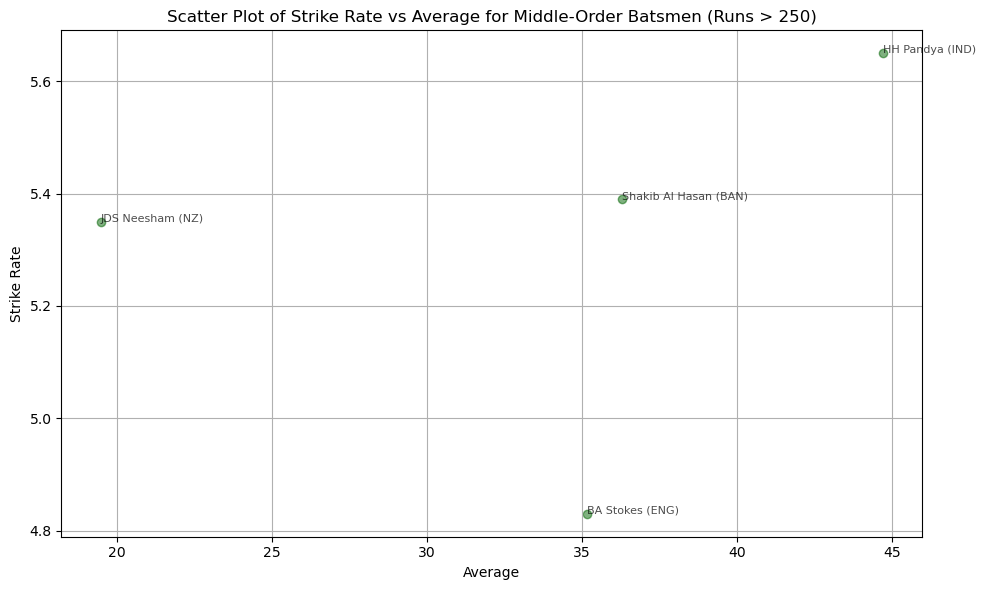

In [144]:
merged_data = pd.merge(batting, bowling, on='Player', how='inner')

all_rounder_above_250 = merged_data[(merged_data['Position_x'] == 'All-rounder') & (merged_data['Runs_x'] > 200) & (merged_data['Overs'] > 40)]

# Create a scatter plot of 'Average' vs. 'Strike Rate'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Scatter plot
scatter = plt.scatter(all_rounder_above_250['Ave_y'], all_rounder_above_250['Econ'], alpha=0.5, color='darkgreen')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Middle-Order Batsmen (Runs > 250)')

# Add player names near the dots
for i, player in all_rounder_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave_y'], player['Econ']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Optional: Ensures the plot layout is neat
plt.show()
